## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [1]:
! git clone https://github.com/yango4014/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 20 (delta 4), reused 3 (delta 3), pack-reused 13
Receiving objects: 100% (20/20), 900.17 KiB | 2.95 MiB/s, done.
Resolving deltas: 100% (4/4), done.


(1000, 5) 

Index(['ï»¿User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')
   ï»¿User ID Gender  Age  AnnualSalary  Purchased
0         385   Male   35         20000          0
1         681   Male   40         43500          0
2         353   Male   49         74000          0
3         895   Male   40        107500          1
4         661   Male   25         79000          0
count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: ï»¿User ID, dtype: float64
count       1000
unique         2
top       Female
freq         516
Name: Gender, dtype: object
count    1000.000000
mean       40.106000
std        10.707073
min        18.000000
25%        32.000000
50%        40.000000
75%        48.000000
max        63.000000
Name: Age, dtype: float64
count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375

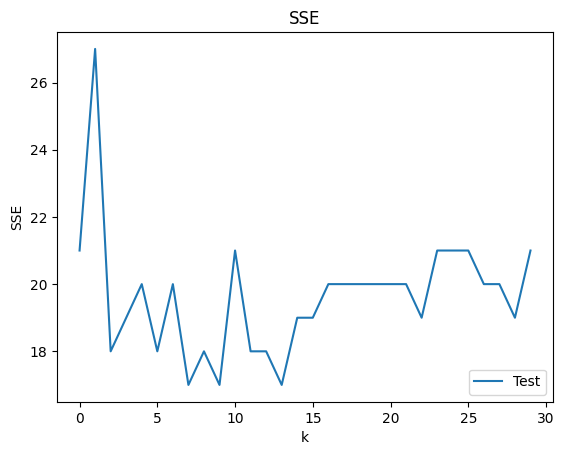

col_0,0,1
Purchased,,
0,105,14
1,3,78


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#1
df = pd.read_csv('assignment3/data/car_data.csv', encoding='latin1')
print(df.shape, '\n') #dimensions of data
print(df.columns)
print(df.head())
#1000 rows and 5 columns based on dimensions

#2
print(df['ï»¿User ID'].describe())
print(df['Gender'].describe())
print(df['Age'].describe())
print(df['AnnualSalary'].describe())
print(df['Purchased'].describe())
#all have the max count of 1000, therefore, no missing values

df['Gender'] = df['Gender'].replace('Male',0)
df['Gender'] = df['Gender'].replace('Female',1)
#print(df['Gender'].describe())

vars = ['Age','AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']

#3
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
X = X.apply(maxmin)
X.describe()

#4
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

#5
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#there seems to be three different optimal k values to use.

#6
model = KNeighborsClassifier(n_neighbors=8)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
pd.crosstab(y_test, y_hat)
#when k = 8, 106 0 classified as 0, 13 0 classified as 1, 4 1 classified as 0, and 77 1 classified as 1
106, 13, 4, 77

model = KNeighborsClassifier(n_neighbors=10)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
pd.crosstab(y_test, y_hat)
#107, 12, 5, 76

model = KNeighborsClassifier(n_neighbors=14)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
pd.crosstab(y_test, y_hat)
#105, 14, 3, 78

#overall accuracy: 183/200 = 0.915


In [25]:
#7
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

model = KNeighborsClassifier(n_neighbors=10)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

y_hat_M = y_hat[ X_test['Gender'] == 0]
y_hat_F = y_hat[ X_test['Gender'] == 1]
y_M = y_test[ X_test['Gender'] == 0]
y_F = y_test[ X_test['Gender'] == 1]

pd.crosstab(y_F, y_hat_F)
#accuracy is 91/105 = 0.867


col_0,0,1
Purchased,,
0,60,7
1,7,31


In [24]:
pd.crosstab(y_M, y_hat_M)
#accuracy is 77/95 = 0.81

#this model does a better job in predicting what a female customer will do, rather than a male
#this can be seen by the fact that 86.7% > 81%

col_0,0,1
Purchased,,
0,49,3
1,15,28


**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor as kNNClassifier

#1
df=pd.read_csv('assignment3/data/airbnb_hw.csv', encoding="latin1")
print(df.shape, '\n') #dimensions of data
print(df.head())

print(df['Price'].count())
print(df['Beds'].count())
print(df['Number Of Reviews'].count())
print(df['Review Scores Rating'].count())

df['Price']=df['Price'].str.replace(",", "")

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce')
df['Number Of Reviews'] = pd.to_numeric(df['Number Of Reviews'], errors='coerce')
df['Review Scores Rating'] = pd.to_numeric(df['Review Scores Rating'], errors='coerce')

     Beds  Number Of Reviews  Review Scores Rating
4  0.1875           0.148438                 0.950
5  0.0625           0.011719                 1.000
6  0.0625           0.031250                 1.000
7  0.0625           0.308594                 0.925
8  0.1250           0.367188                 0.875
               Beds  Number Of Reviews  Review Scores Rating
count  22010.000000       22010.000000          22010.000000
mean       0.097297           0.060388              0.899849
std        0.065211           0.094650              0.110761
min        0.000000           0.000000              0.000000
25%        0.062500           0.007812              0.862500
50%        0.062500           0.023438              0.925000
75%        0.125000           0.074219              1.000000
max        1.000000           1.000000              1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


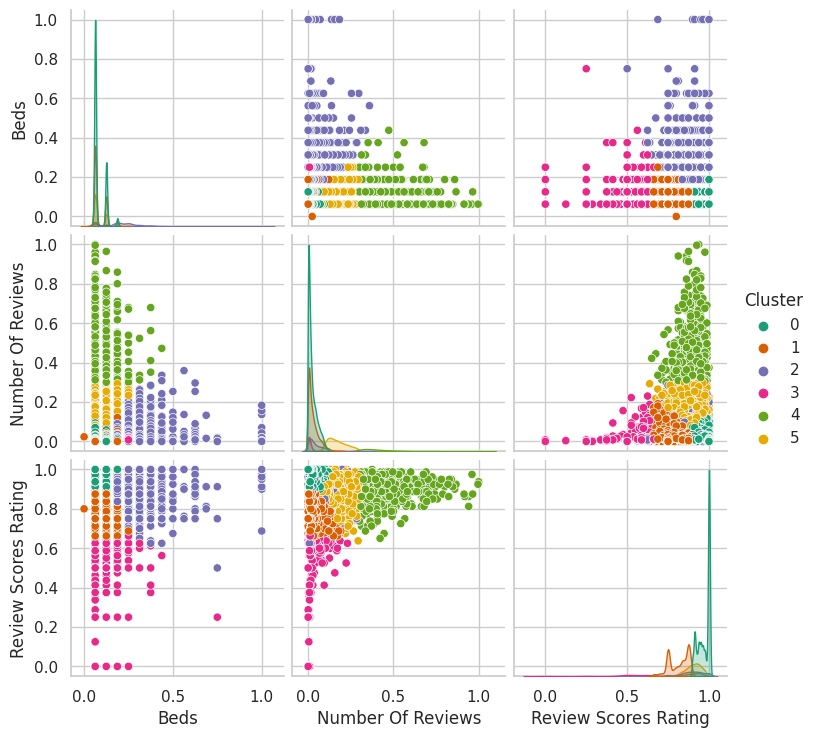

In [46]:
#2

df = df.dropna(subset=["Beds"])
df = df.dropna(subset=["Review Scores Rating"])
X = df.loc[:,['Beds','Number Of Reviews','Review Scores Rating']]

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin)
print(X.head())
print(X.describe())

#3
model = KMeans(n_clusters=6, random_state=0)
X['Cluster'] = model.fit(X[['Beds', 'Number Of Reviews', 'Review Scores Rating']])
X['Cluster'] = model.predict(X[['Beds', 'Number Of Reviews', 'Review Scores Rating']])

#4
sns.set(style="whitegrid")
sns.pairplot(X, hue="Cluster", palette="Dark2")
plt.show()


In [47]:
#5
df.loc[:,['Cluster','Price']].groupby('Cluster').describe()
#it seems like cluster 1 has the highest rental price, though cluster 0 and 5 also have fairly high rental prices too.

Price                                                           
           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        12020.0  159.116140  137.746672  10.0  85.0  130.0  195.0   4500.0
1         4215.0  162.030368  194.436084  20.0  89.0  135.0  195.0  10000.0
2          178.0  125.511236   70.979367  33.0  79.0  100.0  165.0    550.0
3          762.0  134.938320   84.929530  27.0  80.0  115.0  165.0    875.0
4         2903.0  138.539097  161.259782  21.0  70.0  105.0  170.0   5000.0
5         1932.0  146.713251   95.413052  22.0  89.0  125.0  180.0   1500.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


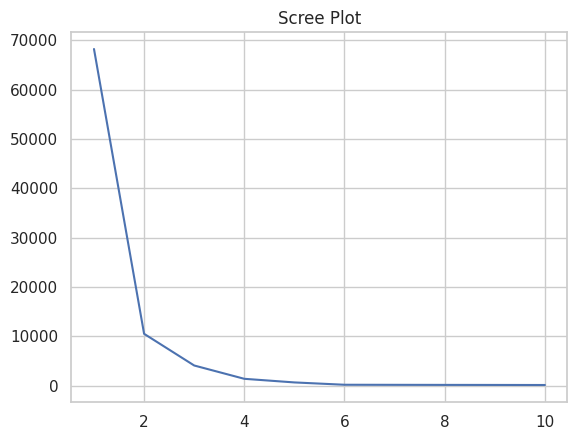

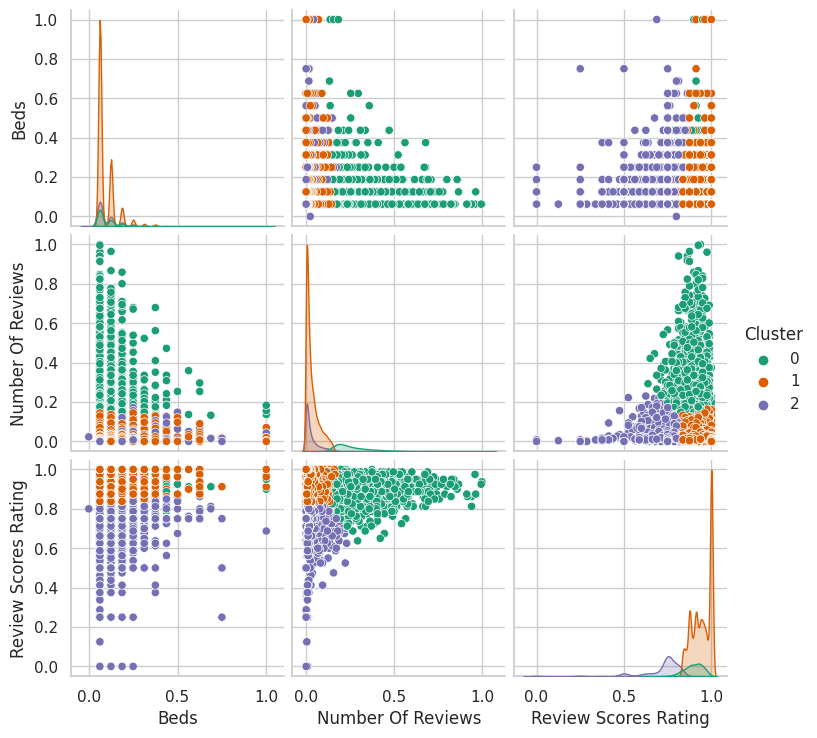

Price                                                           
           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        12020.0  159.116140  137.746672  10.0  85.0  130.0  195.0   4500.0
1         4215.0  162.030368  194.436084  20.0  89.0  135.0  195.0  10000.0
2          178.0  125.511236   70.979367  33.0  79.0  100.0  165.0    550.0
3          762.0  134.938320   84.929530  27.0  80.0  115.0  165.0    875.0
4         2903.0  138.539097  161.259782  21.0  70.0  105.0  170.0   5000.0
5         1932.0  146.713251   95.413052  22.0  89.0  125.0  180.0   1500.0

In [49]:
#6
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
#elbow at 3

model = KMeans(n_clusters=3, random_state=0)
X['Cluster'] = model.fit(X[['Beds', 'Number Of Reviews', 'Review Scores Rating']])
X['Cluster'] = model.predict(X[['Beds', 'Number Of Reviews', 'Review Scores Rating']])

sns.set(style="whitegrid")
sns.pairplot(X, hue="Cluster", palette="Dark2")
plt.show()

df.loc[:,['Cluster','Price']].groupby('Cluster').describe()


**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

<Axes: xlabel='x1', ylabel='x2'>

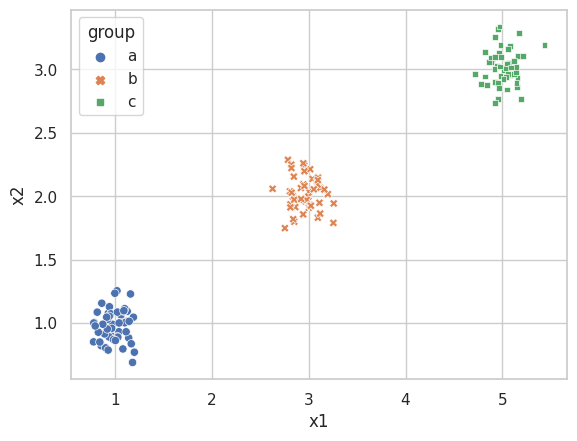

In [51]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

#2
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

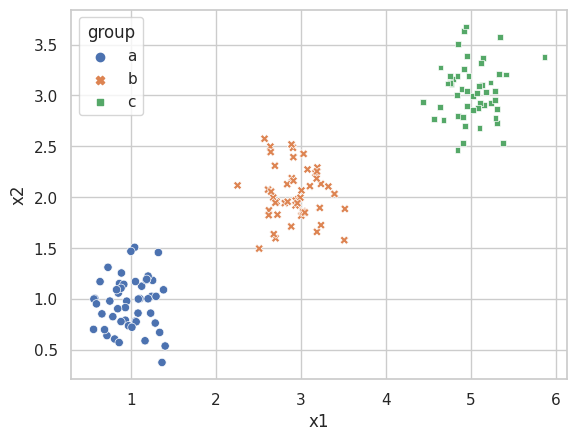

In [52]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

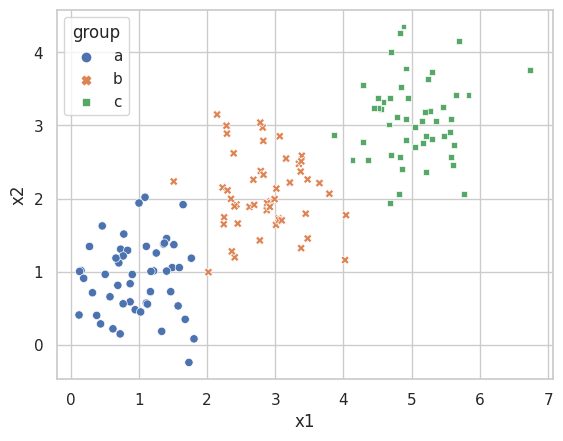

In [53]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

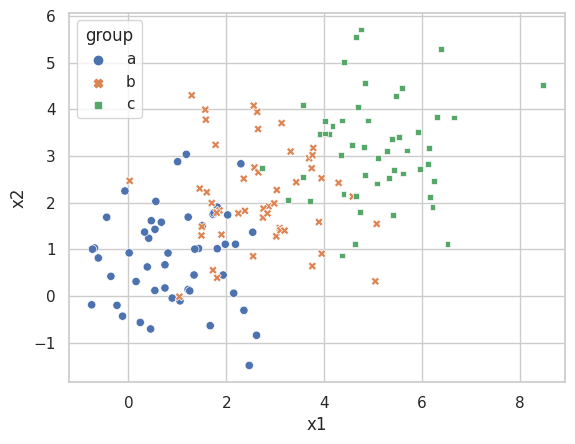

In [54]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

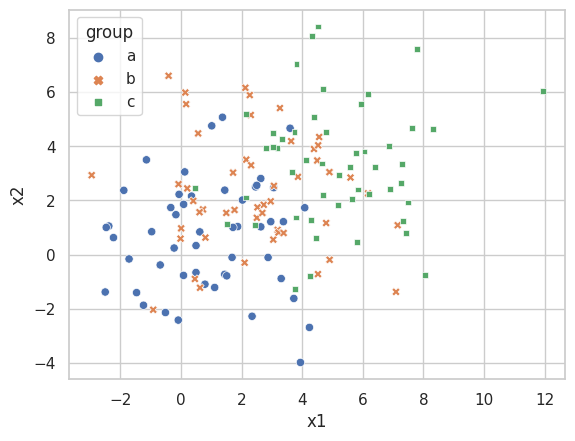

In [55]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
#it seems like as noise goes up, the clusters become more spread out and no longer belong in distinct groups

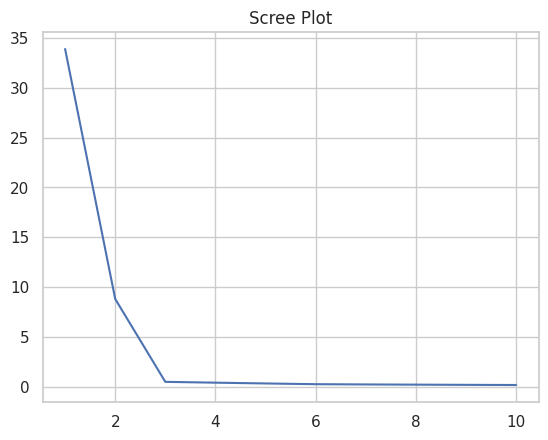

In [62]:
#3
from sklearn.cluster import KMeans

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z

def scree(data):
  X = data.loc[ : , ['x1','x2'] ]
  X = X.apply(maxmin)
  k_bar = 10
  k_grid = np.arange(1,k_bar+1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
      model = model.fit(X)
      SSE[k] = model.inertia_

  scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

scree( data = df0_125 )
#seems to be at k=3

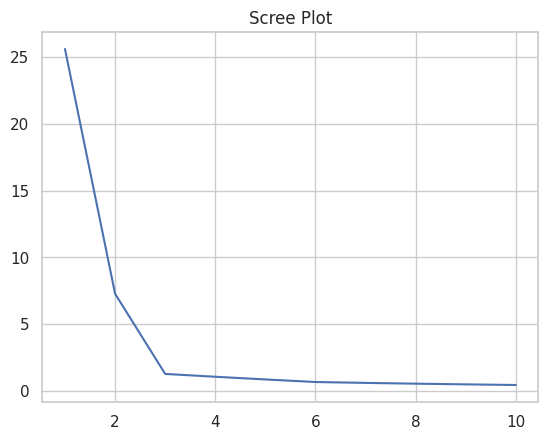

In [63]:
scree( data = df0_25 )
#elbow seems to be at k=3

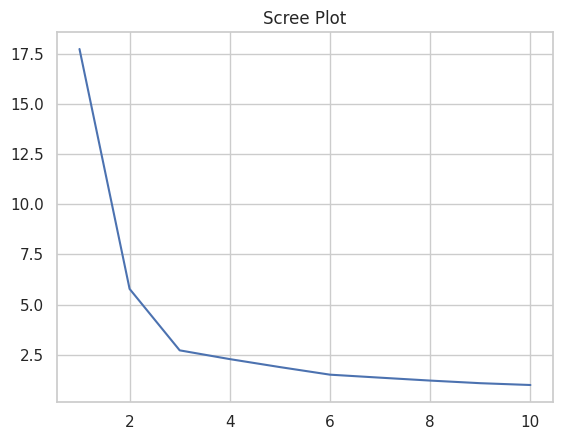

In [64]:
scree( data = df0_5 )
#seems to be at k=3

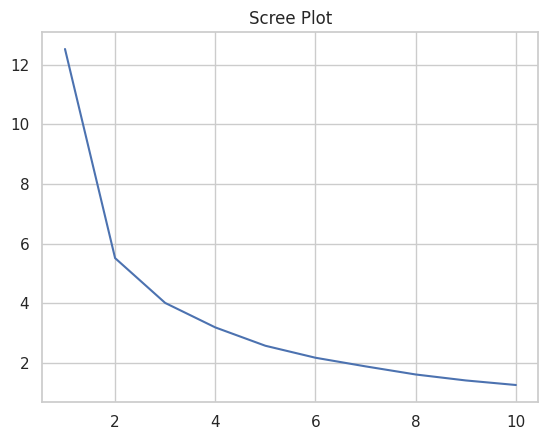

In [65]:
scree( data = df1_0 )
#seems to be at k=3 but it's getting harder to tell

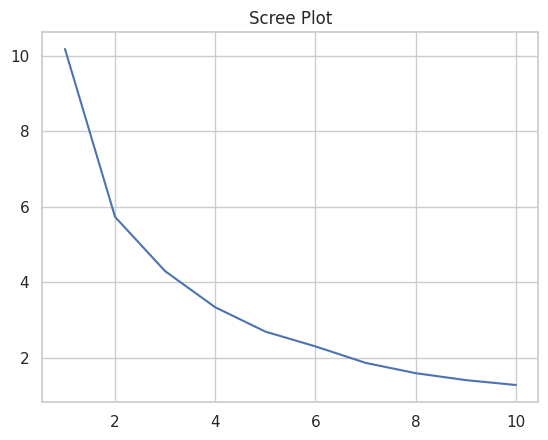

In [66]:
scree( data = df2_0 )
#can't really find an elbow

In [ ]:
#4
#it seems like as we increase in noise, the elbows become harder to tell
#this is likely because when our clusters aren't very distinct, the elbow becomes less noticeable
#since the elbow is depicted as our optimal number of clusters, if we can't distinguish how many clusters we have/
#due to the additional amount of noise, the elbow also becomes less distinguishable